In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
import io

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CAT.csv to CAT.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['CAT.csv']))
print(df)

          Date        Open        High         Low       Close   Adj Close  \
0     2/8/2023  248.100006  251.559998  247.080002  248.869995  243.910446   
1     2/9/2023  250.000000  251.970001  245.479996  246.279999  241.372070   
2    2/10/2023  246.279999  248.630005  244.639999  247.669998  242.734344   
3    2/13/2023  243.500000  248.380005  242.649994  248.149994  243.204803   
4    2/14/2023  247.009995  247.309998  241.649994  244.360001  239.490326   
..         ...         ...         ...         ...         ...         ...   
246   2/1/2024  303.239990  308.070007  301.940002  307.690002  307.690002   
247   2/2/2024  307.000000  317.369995  306.000000  315.089996  315.089996   
248   2/5/2024  334.869995  334.869995  315.910004  321.399994  321.399994   
249   2/6/2024  323.190002  327.429993  319.070007  322.720001  322.720001   
250   2/7/2024  322.940002  327.820007  321.100006  323.589996  323.589996   

        Average  
0    247.904089  
1    247.020413  
2    245.

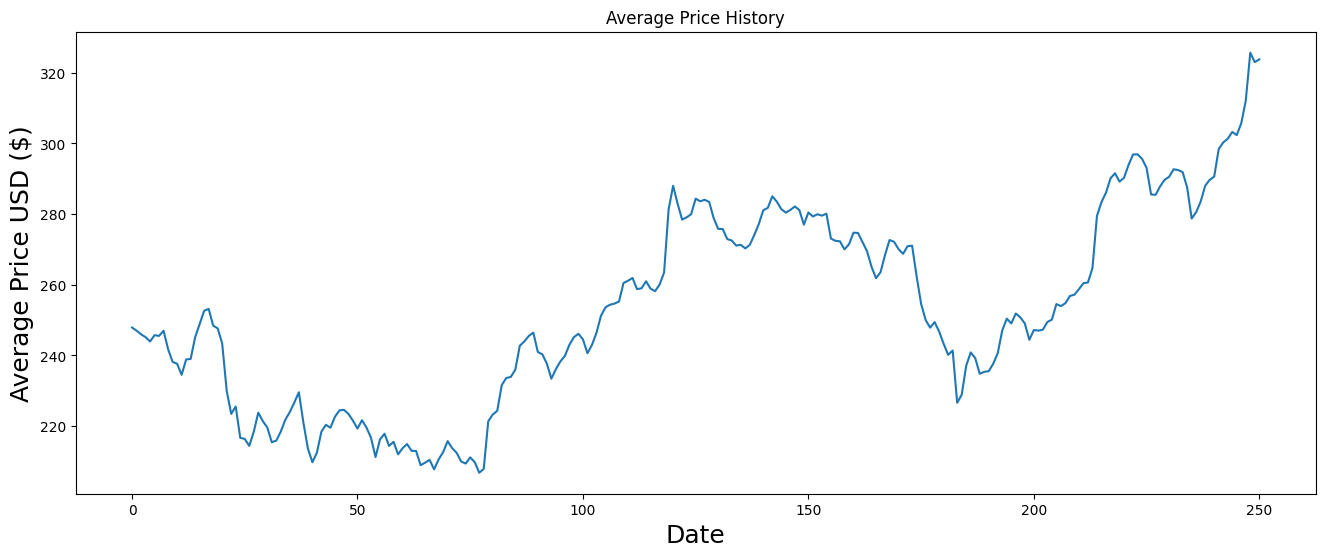

In [5]:
plt.figure(figsize=(16,6))
plt.title('Average Price History')
plt.plot(df['Average'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price USD ($)', fontsize=18)
plt.show()

In [6]:
data = df.filter(['Average'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.95 ))
window_size = 60
training_data_len

239

In [7]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)
print('scaled_data.shape', len(dataset))
scaled_data

scaled_data.shape 251


array([[-0.18676023],
       [-0.21874038],
       [-0.25599947],
       [-0.28545477],
       [-0.32934935],
       [-0.26548495],
       [-0.27248072],
       [-0.21953722],
       [-0.4085852 ],
       [-0.53882408],
       [-0.55779616],
       [-0.6713204 ],
       [-0.51444394],
       [-0.50844668],
       [-0.28704978],
       [-0.15097545],
       [-0.01513581],
       [ 0.00365758],
       [-0.16790954],
       [-0.19535169],
       [-0.35115165],
       [-0.83661743],
       [-1.07086712],
       [-0.99667299],
       [-1.31718807],
       [-1.32789208],
       [-1.3995215 ],
       [-1.25501951],
       [-1.05888374],
       [-1.14495037],
       [-1.2116832 ],
       [-1.36224453],
       [-1.34523336],
       [-1.25195781],
       [-1.13134835],
       [-1.05195291],
       [-0.9544263 ],
       [-0.85005843],
       [-1.15892082],
       [-1.42507487],
       [-1.56732374],
       [-1.46879122],
       [-1.25419284],
       [-1.1831015 ],
       [-1.21323536],
       [-1

In [8]:
train_data = scaled_data[0: int(training_data_len)]
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i <= window_size + 1:
      print('x_train', x_train)
      print('\n y_train', y_train)
      print()

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('x_train.shape', x_train.shape)

x_train [array([-0.18676023, -0.21874038, -0.25599947, -0.28545477, -0.32934935,
       -0.26548495, -0.27248072, -0.21953722, -0.4085852 , -0.53882408,
       -0.55779616, -0.6713204 , -0.51444394, -0.50844668, -0.28704978,
       -0.15097545, -0.01513581,  0.00365758, -0.16790954, -0.19535169,
       -0.35115165, -0.83661743, -1.07086712, -0.99667299, -1.31718807,
       -1.32789208, -1.3995215 , -1.25501951, -1.05888374, -1.14495037,
       -1.2116832 , -1.36224453, -1.34523336, -1.25195781, -1.13134835,
       -1.05195291, -0.9544263 , -0.85005843, -1.15892082, -1.42507487,
       -1.56732374, -1.46879122, -1.25419284, -1.1831015 , -1.21323536,
       -1.10133685, -1.0357683 , -1.02990002, -1.07223517, -1.14101463,
       -1.22206759, -1.13619755, -1.21161627, -1.31630907, -1.51414343,
       -1.33265327, -1.27480478, -1.39950836, -1.35729018, -1.48614906])]

 y_train [-1.423097840146824]

x_train [array([-0.18676023, -0.21874038, -0.25599947, -0.28545477, -0.32934935,
       -0.26

In [9]:
print(x_train.shape[1])

60


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
!pip install layers

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for layers: filename=layers-0.1.5-py3-none-any.whl size=5355 sha256=e10d7cc6a6848e9e06a46cb9b38093c2852455f62fa2a6b2ce760fd9ed95a745
  Stored in directory: /root/.cache/pip/wheels/68/7e/9a/eef1bfd14949d8154d75aaa90cb20916e5b3e706ccab344690
  Created wheel for bashutils: filename=Bashutils-0.0.4-py3-none-any.whl size=5459 sha256=380f549a2001c04a90229e9e417d448c467cd7676867fc53648cb54b31f5c496
  Stored in directory: /root/.cache/pip/wheels/25/49/d6/964f90673b8cb71f4a9fd6b19fdf69321c355bc1b48b0b5094
Successfully built layers bashutils


In [11]:
import tensorflow as tf

In [12]:
def build_lstm_model():
  input = tf.keras.layers.Input(shape = (x_train.shape[1], 1), name = 'input')
  x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences = True))(input)
  x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences = False, dropout = 0.5))(x)
  output = tf.keras.layers.Dense(1, name = "last_dense")(x)
  model = tf.keras.Model(inputs = input, outputs = output)
  return model

LSTM_model = build_lstm_model()
LSTM_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional (Bidirection  (None, 60, 256)           133120    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 last_dense (Dense)          (None, 1)                 129       
                                                                 
Total params: 297601 (1.14 MB)
Trainable params: 297601 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
epochs = 50
batch_size = 32
early_stopping_patience = 20

LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
price = LSTM_model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/50
6/6 [==============================] - 22s 414ms/step - loss: 0.4304
Epoch 2/50
6/6 [==============================] - 1s 221ms/step - loss: 0.1414
Epoch 3/50
6/6 [==============================] - 1s 221ms/step - loss: 0.0915
Epoch 4/50
6/6 [==============================] - 1s 220ms/step - loss: 0.0763
Epoch 5/50
6/6 [==============================] - 1s 221ms/step - loss: 0.0634
Epoch 6/50
6/6 [==============================] - 1s 223ms/step - loss: 0.0650
Epoch 7/50
6/6 [==============================] - 1s 223ms/step - loss: 0.0545
Epoch 8/50
6/6 [==============================] - 1s 222ms/step - loss: 0.0478
Epoch 9/50
6/6 [==============================] - 2s 361ms/step - loss: 0.0486
Epoch 10/50
6/6 [==============================] - 2s 303ms/step - loss: 0.0443
Epoch 11/50
6/6 [==============================] - 1s 226ms/step - loss: 0.0422
Epoch 12/50
6/6 [==============================] - 1s 224ms/step - loss: 0.0413
Epoch 13/50
6/6 [==============================]

In [14]:
test_data = scaled_data[training_data_len - window_size: ]
print('len(test_data): ', len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i - window_size:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = LSTM_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data):  72
1/1 [==============================] - 4s 4s/step


18.939488364269348

<ipython-input-16-8f188311654f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


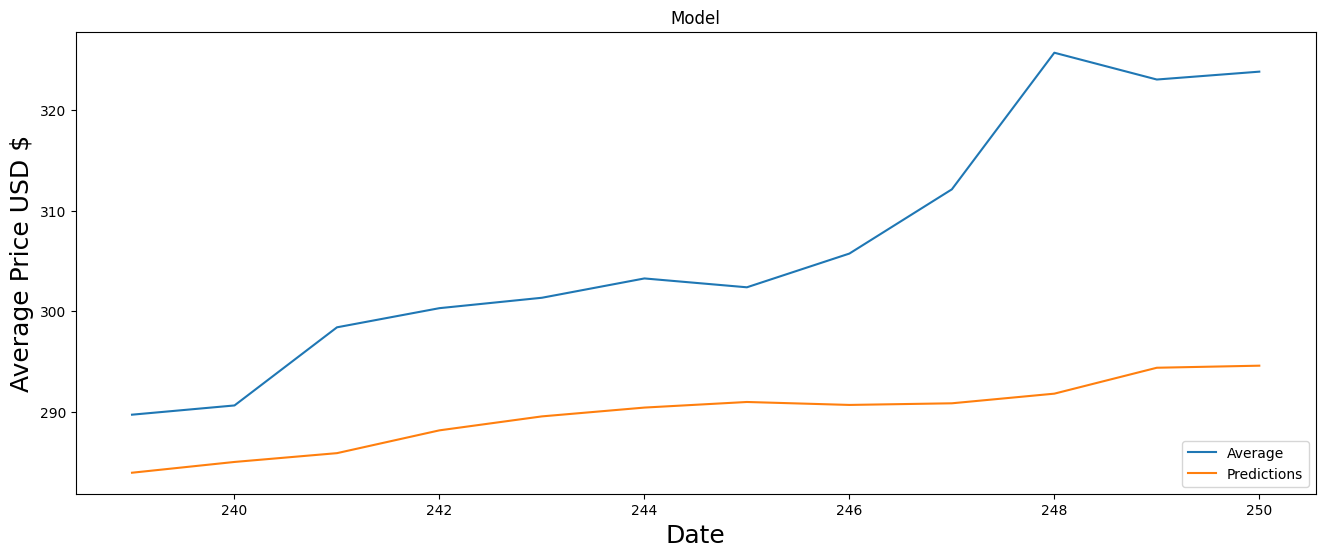

In [16]:
train = data[: training_data_len]
test = data[training_data_len: ]
test['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Average Price USD $', fontsize = 18)
plt.plot(test[['Average', 'Predictions']])
plt.legend(['Average', 'Predictions'], loc = 'lower right')
plt.show()

In [17]:
test[:]

,Average,Predictions
239,289.711994,283.942902
240,290.629993,285.013550
241,298.395996,285.888245
242,300.300000,288.155243
243,301.334003,289.542694
244,303.254010,290.418488
245,302.373999,290.974091
246,305.726001,290.681152
247,312.109997,290.843323
248,325.689996,291.801544
